## Kod w mniejszym lub większym stopniu wzorowany na kodzie z laboratorium 9,10 na Nauczaniu maszynowym, WMI, UJ, 2019/20, semestr zimowy

Feedforward neural network
trained on MINIST dataset

In [1]:
from lib_linear import *
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import torch.nn.functional as F
from scipy.linalg import null_space

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(255/256, 1, N)    ## red  255,192, 203
vals[:, 1] = np.linspace(192/256, 1, N)
vals[:, 2] = np.linspace(203/256, 1, N)  ## blue 75, 0, 130
Pinks = ListedColormap(vals)


top = cm.get_cmap(Pinks, 256)
bottom = cm.get_cmap('Purples', 256)

newcolors = np.vstack((top(np.linspace(0, 1, 256)),
                       bottom(np.linspace(0, 1, 256))))

newcmp = ListedColormap(newcolors, name='PinkPueple')

## Load data

In [2]:
mean, std = calculate_mean_and_std_FMNIST()
train_data, test_data =  download_normalized_data_FMNIST(mean, std)

batch_size = 1
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz


Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz


Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz



Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


C:\Users\Laptop\AppData\Roaming\Python\Python38\site-packages\torchvision\datasets\mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


## Input input

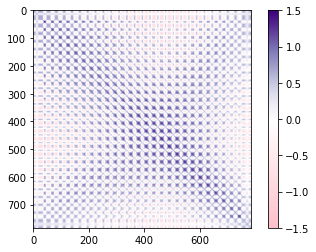

In [3]:
batch_size = 1
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)


P = torch.zeros(784, 784)
counter = 0

for i, (x,y) in enumerate(train_loader):  
        
    P = P + torch.matmul(x.T, x)
    counter += 1
    
P_average = P/counter 
input_input_corr = P_average.detach().numpy()

plt.imshow(P_average, cmap = newcmp, vmax = 1.5, vmin = -1.5)
plt.colorbar()
plt.show()
     

# output-input

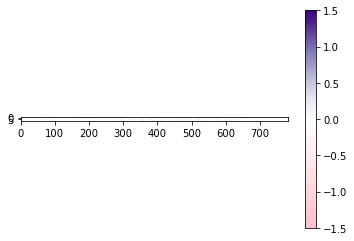

In [4]:
P = torch.zeros(10, 784)
counter = 0

for i, (x,y) in enumerate(train_loader):  
        
    Y = torch.zeros(10)
    Y[y[0]]=1    
    P = P + (torch.mm(Y.view(10, 1), x.view(1, 784)))
    counter += 1
   
    
P_average = P/counter
output_input_corr = P_average.detach().numpy()

plt.imshow(P_average, cmap = newcmp, vmax = 1.5, vmin = -1.5)
plt.colorbar()
plt.show() 

## Output- output

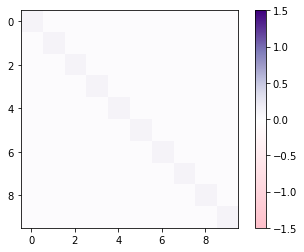

In [5]:
P = torch.zeros(10, 10)
counter = 0

for i, (x,y) in enumerate(train_loader):  
        
    Y = torch.zeros(10)
    Y[y[0]]=1
    P = P + (torch.mm(Y.view(10, 1), Y.view(1,10)))
    counter += 1
    
P_average = P/counter 
output_output_corr = P_average.detach().numpy()

plt.imshow(output_output_corr, cmap = newcmp, vmax = 1.5, vmin = -1.5)
plt.colorbar()
plt.show() 

## Singular value decomposition of $\Sigma^{31}$ (input-output corr)

In [6]:
u, s, vh = np.linalg.svd(output_input_corr, full_matrices=True, compute_uv=True, hermitian=False)

## Show, that $V^{11}$ from the paper does not work

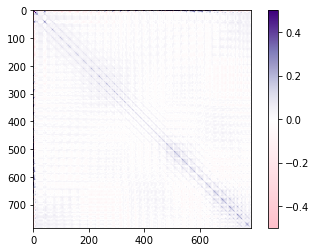

In [7]:
Sigma = vh.T @ input_input_corr @ vh   ## Sigma -> S11

plt.imshow(Sigma, cmap = newcmp, vmax = .5, vmin = -0.5)
plt.colorbar()
plt.show()

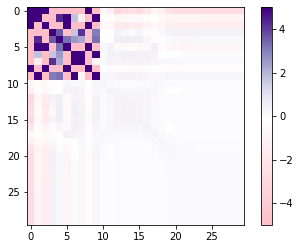

In [8]:
Sigma = vh.T @ input_input_corr @ vh   ## Sigma -> S11
plt.imshow(Sigma[:30,:30], cmap = newcmp, vmax = 5, vmin = -5)
plt.colorbar()
plt.show()

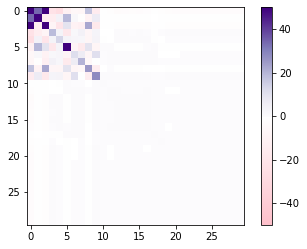

In [9]:
Sigma = vh.T @ input_input_corr @ vh   ## Sigma -> S11
plt.imshow(Sigma[:30,:30], cmap = newcmp, vmax = 50, vmin = -50)
plt.colorbar()
plt.show()

## Create $V^{11}$ such that $S^{31} = U^{33} \Sigma ^{31} V^{11T} $ and $S^{11} = V^{11} \Sigma^{11} V^{11T}$

In [10]:
v_importantT = np.zeros((784, 784))
v_importantT[:10, :] = vh[:10, :]

v_important = v_importantT.T

P_Vimp = (np.identity(784) - (v_important @ v_importantT))

in_in_corr_otro = P_Vimp @ input_input_corr @ P_Vimp
eig_orto, v_orto =  np.linalg.eig(in_in_corr_otro)

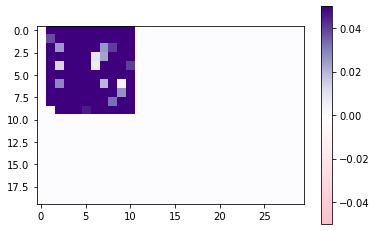

In [11]:
M = np.abs(v_importantT@v_orto)
plt.imshow(M[:20,660: 690], cmap = newcmp, vmax = .05, vmin = -0.05)
plt.colorbar()
plt.show()

In [12]:
v_new = np.zeros((784, 784))
v_new[:, :10] = v_important[:,:10]
v_new[:, 10:671] = v_orto[:, :661]

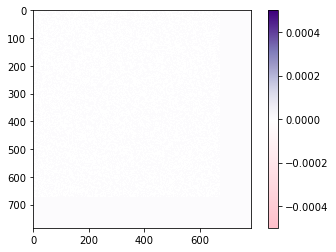

In [13]:
temp = np.zeros((784, 784))
temp[:671,:671] = np.identity(671)

plt.imshow(v_new.T @ v_new - temp, cmap = newcmp, vmax = .0005, vmin = -0.0005)
plt.colorbar()
plt.show()

### Gram-Schmidt procedure to complet V:

In [14]:
from copy import copy
v_my = copy(v_new)

for i in range(671, 784):
    x = np.random.uniform( size=(784)) 
    x /= np.linalg.norm(x)
    for j in range(i):
        col = v_my[:, j]
        x -= x.dot(col) * col/ np.linalg.norm(col)**2
    
    v_my[:,i] = x/ np.linalg.norm(x)
    

## Final check

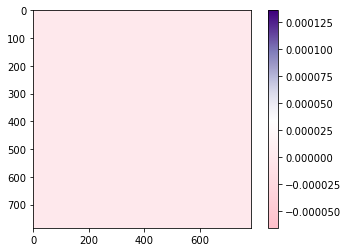

In [15]:
VVV = v_my.T @ v_my

plt.imshow(v_my.T @ v_my - np.identity(784), cmap = newcmp)
plt.colorbar()
plt.show()

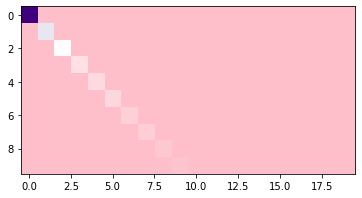

In [16]:
ss = np.zeros((10, 784))
ss[:10, :10] = np.diag(s)
plt.imshow(ss[:10, :20], cmap=newcmp)

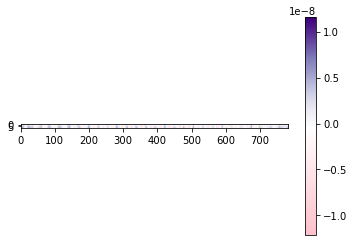

In [17]:
s31_check = (u @ ss @ v_my.T)

plt.imshow(output_input_corr - s31_check, cmap = newcmp)
plt.colorbar()
plt.show()

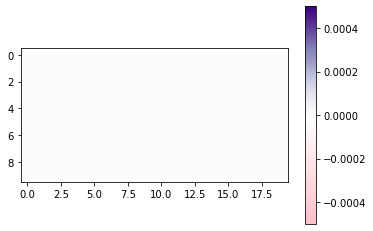

In [18]:
error = vh-v_my.T
plt.imshow(error[:10,:20], cmap = newcmp, vmax = .0005, vmin = -0.0005)
plt.colorbar()
plt.show()

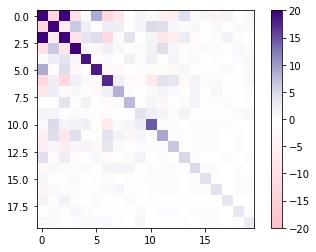

In [19]:
Sigma_new = (v_my.T) @ input_input_corr @ v_my
plt.imshow(Sigma_new[:20,:20], cmap = newcmp, vmax = 20, vmin = -20)
plt.colorbar()
plt.show()

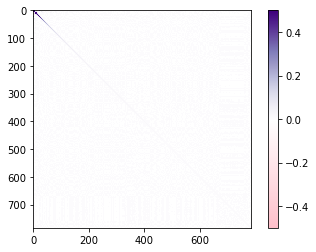

In [20]:
Sigma_new = (v_my.T) @ input_input_corr @ v_my
plt.imshow(Sigma_new[:,:], cmap = newcmp, vmax = 0.5, vmin = -0.5)
plt.colorbar()
plt.show()

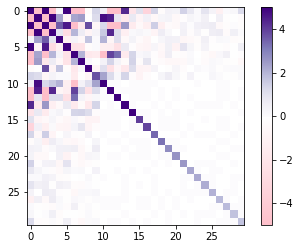

In [21]:
Sigma_new = (v_my.T) @ input_input_corr @ v_my
plt.imshow(Sigma_new[:30,:30], cmap = newcmp, vmax = 5, vmin = -5)
plt.colorbar()
plt.show()

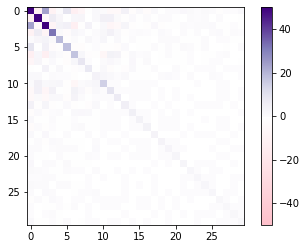

In [22]:
Sigma_new = (v_my.T) @ input_input_corr @ v_my
plt.imshow(Sigma_new[:30,:30], cmap = newcmp, vmax = 50, vmin = -50)
plt.colorbar()
plt.show()

In [26]:
delta = np.abs(input_input_corr).sum() - np.diagonal(input_input_corr).sum()
percentage = 100* delta /  np.abs(input_input_corr).sum()

delta_saxe = np.abs(Sigma).sum() - np.diagonal(Sigma).sum()
percentage_saxe = 100* delta_saxe /  np.abs(Sigma).sum()

delta_our = np.abs(Sigma_new).sum() - np.diagonal(Sigma_new).sum()
percentage_our = 100* delta_our /  np.abs(Sigma_new).sum()

print(delta, percentage)
print(delta_saxe, percentage_saxe)
print(delta_our, percentage_our)

216709.02 99.63956444562712
22582.57 96.64508628891225
872.0497302486865 52.66080824756446


In [ ]:
STOP

In [ ]:
import pandas as pd

V_matrix = pd.DataFrame(v_my) ## V11
U_matrix = pd.DataFrame(u)    ## U33
S_matrix = pd.DataFrame(s)    ## S31

input_input_matrix = pd.DataFrame(input_input_corr) 
output_input_matrix = pd.DataFrame(output_input_corr) 
output_output_matrix = pd.DataFrame(output_output_corr) 


V_matrix.to_csv('V_matrix_F.csv', index=False)
U_matrix.to_csv('U_matrix_F.csv', index=False)
S_matrix.to_csv('S_matrix_F.csv', index=False)

input_input_matrix.to_csv('input_input_matrix_F.csv', index=False)
output_input_matrix.to_csv('output_input_matrix_F.csv', index=False)
output_output_matrix.to_csv('output_output_matrix_F.csv', index=False)